## Lesson 6: 
### Exercise 1: Black-hole binary formation channels with gaussian mixtures.

### (Multi-components gaussian fitting )

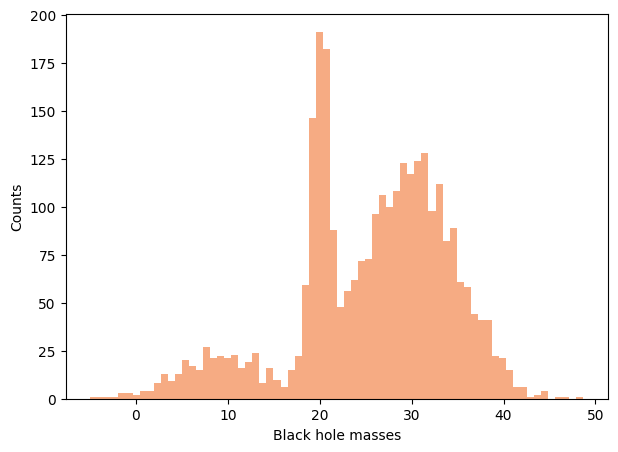

In [197]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
# Import some pretty colors from Seaborn
colors = sns.color_palette('rocket', 5)
# ---------------------------------------------------
# Load the data file
data = np.load('formationchannels.npy')
#----------------------------------------------------
# Plot the histogram of our data
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data, bins=70, color=colors[4]);
ax.set_ylabel('Counts')
ax.set_xlabel('Black hole masses');

In [191]:
data.shape #Check if data are in the correct format for sklearn: (N, 1)

(2950, 1)

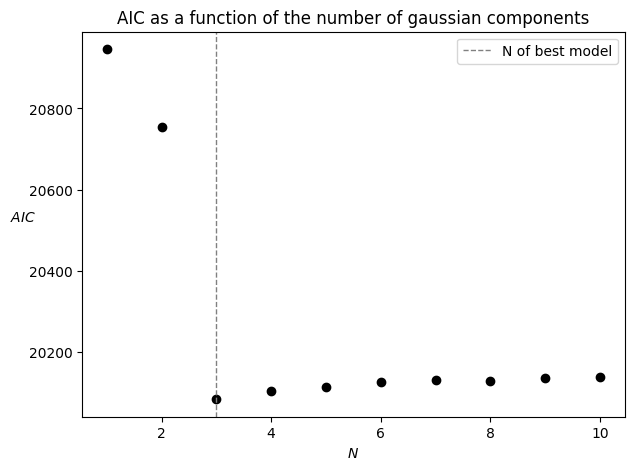

The best model, according to AIC criterion, is the one with 3 components


In [192]:
# Fitting the data with a mixture of gaussians with variable number of components
# Computing the AIC of each fit for best model selection (lowest AIC score)

AIC_arr = []
fig, ax = plt.subplots(figsize=(7, 5))
for N in range(1, 11):
    mod = GaussianMixture(n_components=N)
    fit = mod.fit(data)
    AIC = fit.aic(data)
    ax.scatter(N, AIC, marker = 'o', c = 'k')
    AIC_arr.append(AIC)

#----------------------------------------------------
components = [n for n in range(1,11)]
chosen_component = components[np.argsort(AIC_arr)[0]]
# Plotting the results
ax.axvline(x=chosen_component , c='grey', ls = '--', lw = 1, label = 'N of best model')
ax.set_ylabel('$AIC$', rotation = 0)
ax.set_xlabel('$N$')
ax.set_title('AIC as a function of the number of gaussian components')
ax.legend(loc = 'upper right')
plt.show()

print(f"The best model, according to AIC criterion, is the one with %i components"% chosen_component)
    

---

- Once we've determined the best number of Gaussian components to fit our data, we can plot the resulting Gaussian Mixture function on top of the original data for comparison (We use the *score_samples* function)

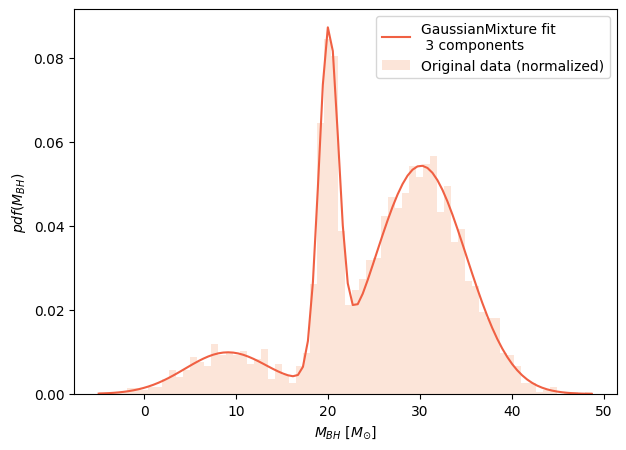

In [211]:
mod = GaussianMixture(n_components=chosen_component)
fit = mod.fit(data)

fig, ax = plt.subplots(figsize=(7,5))

x = np.linspace(np.min(data), np.max(data), 100)
x = x.reshape(-1, 1)

y_log = fit.score_samples(x)
fx = lambda j : np.exp(fit.score_samples(j))

# Plot the result of the fit on top of the original data 
plt.plot(x, fx(x), c=colors[3], label=f'GaussianMixture fit \n %i components'%chosen_component)
plt.hist(data, density=True, bins=70, alpha=0.3, color=colors[-1], label='Original data (normalized)');
plt.xlabel(r'$M_{BH}$ $[M_{\odot}]$')
plt.ylabel(r'$pdf(M_{BH})$')
plt.legend();

- Then we can also visualize the single Gaussian components to understand which Gaussian mode corresponds to which part of the input dataset (We use the *predict_proba* function to get the so called "**responsibilities**": the probabilities associated to each mode for each single data point)

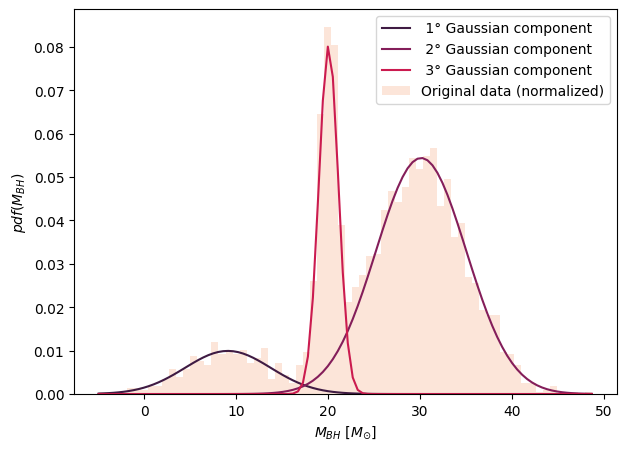

In [210]:
fig, ax = plt.subplots(figsize=(7,5))

responsibilities = fit.predict_proba(x)
for n, c in zip(range(0, chosen_component), colors):
    y_pdf = responsibilities[:, n] * fx(x)
    plt.plot(x, y_pdf, c=c, label=f" %i° Gaussian component"%(n+1))

plt.hist(data, density=True, bins=70, alpha=0.3, color=colors[-1], label='Original data (normalized)');
plt.xlabel(r'$M_{BH}$ $[M_{\odot}]$')
plt.ylabel(r'$pdf(M_{BH})$')
plt.legend();